In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import os
import PIL
import cv2

In [7]:
data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=data_url, 
                        cache_dir='C://users//sameer//Desktop',untar=True)

In [8]:
data_dir

'C://users//sameer//Desktop\\datasets\\flower_photos'

In [9]:
import pathlib

In [11]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos')

In [13]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('C:/users/

In [14]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [15]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [16]:
len(roses)

641

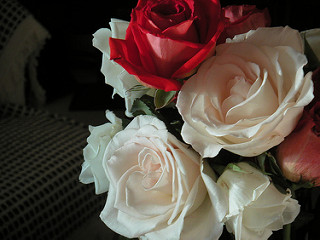

In [17]:
PIL.Image.open(str(roses[1]))

In [18]:
daisy = list(data_dir.glob('daisy/*'))
daisy[:5]

[WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/users/sameer/Desktop/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

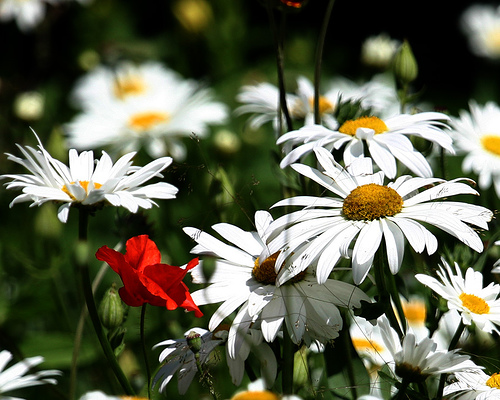

In [21]:
PIL.Image.open(daisy[5])

In [41]:
flower_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [37]:
flower_classes = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [32]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [33]:
img.shape

(240, 179, 3)

In [34]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [62]:
X = []
y = []
for flower_name, images in flower_images_dict.items():
    for image in images:
        n_img = cv2.imread(str(image))
        img_scaled = cv2.resize(n_img,(180,180))
        X.append(img_scaled)
        y.append(flower_classes[flower_name])

In [63]:
X = np.array(X)
y = np.array(y)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 10)

In [65]:
# Normalization
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [68]:
X_train_scaled[0]

array([[[0.14117647, 0.4       , 0.31372549],
        [0.14901961, 0.57254902, 0.46666667],
        [0.20784314, 0.47843137, 0.40784314],
        ...,
        [0.07058824, 0.50196078, 0.24313725],
        [0.10588235, 0.47843137, 0.19607843],
        [0.05098039, 0.56470588, 0.29803922]],

       [[0.18039216, 0.54901961, 0.4745098 ],
        [0.1372549 , 0.44313725, 0.37254902],
        [0.29803922, 0.58431373, 0.54901961],
        ...,
        [0.04313725, 0.4627451 , 0.19215686],
        [0.19215686, 0.46666667, 0.24705882],
        [0.06666667, 0.41960784, 0.2       ]],

       [[0.16470588, 0.51372549, 0.47058824],
        [0.2745098 , 0.63137255, 0.58431373],
        [0.06666667, 0.38431373, 0.31764706],
        ...,
        [0.01176471, 0.46666667, 0.2       ],
        [0.14117647, 0.50980392, 0.28235294],
        [0.0745098 , 0.56862745, 0.32941176]],

       ...,

       [[0.07058824, 0.2745098 , 0.2627451 ],
        [0.31764706, 0.59607843, 0.56862745],
        [0.06666667, 0

In [71]:
num_class = 5
model = Sequential([
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_class)
])

model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])
model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
81/81 [==============================] - 85s 1s/step - loss: 1.6235 - accuracy: 0.3577
Epoch 2/10
81/81 [==============================] - 708s 9s/step - loss: 1.1136 - accuracy: 0.5530
Epoch 3/10
81/81 [==============================] - 47s 586ms/step - loss: 0.8236 - accuracy: 0.6726
Epoch 4/10
81/81 [==============================] - 46s 569ms/step - loss: 0.5922 - accuracy: 0.7937
Epoch 5/10
81/81 [==============================] - 45s 560ms/step - loss: 0.3329 - accuracy: 0.8865
Epoch 6/10
81/81 [==============================] - 45s 559ms/step - loss: 0.1791 - accuracy: 0.9425
Epoch 7/10
81/81 [==============================] - 45s 557ms/step - loss: 0.1413 - accuracy: 0.9562
Epoch 8/10
81/81 [==============================] - 46s 566ms/step - loss: 0.1000 - accuracy: 0.9737
Epoch 9/10
81/81 [==============================] - 50s 624ms/step - loss: 0.0478 - accuracy: 0.9876
Epoch 10/10
81/81 [==============================] - 69s 849ms/step - loss: 0.0707 - accuracy: 0

In [72]:
model.evaluate(X_test_scaled,y_test) # Low accuracy because of overfitting the model

35/35 [==============================] - 16s 281ms/step - loss: 2.1700 - accuracy: 0.5931


[2.1699697971343994, 0.5930972099304199]

In [73]:
# Data augmentation
# Data set is been expanded with images with different-
# rotation of axis
# random zooming
# Contrasting images

In [79]:
aug_mod = keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.9)
])

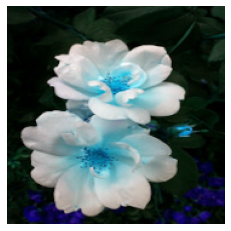

In [80]:
plt.axis('off')
plt.imshow(X[0])

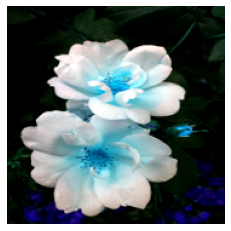

In [81]:
# Zoomed image
plt.axis('off')
plt.imshow(aug_mod(X)[0])

In [85]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',
                                                 input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.4),
])

In [86]:
num_classes = 5
A_model = keras.Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

A_model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics = ['accuracy'])

A_model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
81/81 [==============================] - 55s 625ms/step - loss: 1.5919 - accuracy: 0.2798
Epoch 2/10
81/81 [==============================] - 51s 634ms/step - loss: 1.2071 - accuracy: 0.4864
Epoch 3/10
81/81 [==============================] - 52s 638ms/step - loss: 1.0225 - accuracy: 0.5615
Epoch 4/10
81/81 [==============================] - 59s 725ms/step - loss: 1.0134 - accuracy: 0.5945
Epoch 5/10
81/81 [==============================] - 78s 964ms/step - loss: 0.9283 - accuracy: 0.6327
Epoch 6/10
81/81 [==============================] - 82s 1s/step - loss: 0.8876 - accuracy: 0.6357
Epoch 7/10
81/81 [==============================] - 80s 987ms/step - loss: 0.8956 - accuracy: 0.6601
Epoch 8/10
81/81 [==============================] - 83s 1s/step - loss: 0.8690 - accuracy: 0.6480
Epoch 9/10
81/81 [==============================] - 86s 1s/step - loss: 0.8492 - accuracy: 0.6706
Epoch 10/10
81/81 [==============================] - 81s 994ms/step - loss: 0.8129 - accuracy: 0.678

In [87]:
A_model.evaluate(X_test_scaled,y_test)

35/35 [==============================] - 9s 175ms/step - loss: 0.8602 - accuracy: 0.6848


[0.8601797223091125, 0.684831976890564]

In [88]:
# A 10% increase in accuracy in classification